In [183]:
!pip install linearmodels

In [478]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf  # For statistical modeling using R-style formulas
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
filepath = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/'

In [135]:
last_df = pd.read_csv("DataScience/Data/Database.csv")

In [137]:
last_df.keys()

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', 'corn1992', 'forest', 'suitability', '% Land available',
       'price', 'temperature', 'Average_Temperature', 'gdp', 'rain', 'bci_bci',
       'wdi_poprul'],
      dtype='object')

In [139]:
last_df["logcorn"]= np.log(last_df["corn"])
last_df["logforest"]= np.log(last_df["forest"])
last_df["logland"]= np.log(last_df["landArea"])
last_df["loggdp"]= np.log(last_df['gdp'])
last_df['logsuit']= np.log(last_df['suitability'])
last_df['hetero']= last_df['hetero'] = last_df['logsuit'].apply(lambda val: 1 if (val>last_df['logsuit'].median()) else 0)

C:\Users\simon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



In [141]:
last_df[last_df['suitability'] < 0]['country'].unique()

array(['Egypt', 'Croatia', 'Hungary', 'Moldova', 'Malawi', 'Nepal',
       'Philippines', 'Romania', 'El Salvador', 'Slovenia'], dtype=object)

# **Data Description**

In [144]:
print(last_df[['landArea', 'corn', 'forest', 'suitability', 'price', 'temperature', 'Average_Temperature', 'gdp', 'rain', 
        'bci_bci', 'logcorn', 'logforest', 'logland', 'loggdp', 'logsuit', 'wdi_poprul']].describe())

           landArea           corn       forest    suitability        price  \
count  1.672000e+03    1672.000000  1672.000000    1672.000000  1672.000000   
mean   1.247189e+06   18443.444378   420.370336   39828.556579     3.956591   
std    2.764016e+06   56118.363990  1318.062045   85176.396845     1.422381   
min    1.997000e+03       0.080000     0.077100  -22460.740000     2.047500   
25%    9.141750e+04     587.787500    15.106300    1080.262500     2.460000   
50%    2.558350e+05    3335.015000    47.590300   11385.685000     3.890000   
75%    7.699425e+05   10346.352500   143.618425   27522.282500     4.555000   
max    1.638139e+07  449680.000000  9559.229900  419387.940000     6.982500   

       temperature  Average_Temperature           gdp         rain  \
count  1672.000000          1672.000000  1.672000e+03  1672.000000   
mean      1.105424            17.516649  6.221002e+05  1066.141268   
std       0.543722             8.028782  2.174153e+06   712.686235   
min     

In [146]:
print(last_df[['landArea', 'corn', 'forest', 'suitability', 'price', 'temperature', 'Average_Temperature', 'gdp', 'rain', 
        'bci_bci', 'logcorn', 'logforest', 'logland', 'loggdp', 'logsuit', 'wdi_poprul']].skew())

landArea               3.450905
corn                   5.092154
forest                 5.143879
suitability            2.871974
price                  0.529706
temperature            0.501291
Average_Temperature   -0.475659
gdp                    6.663180
rain                   0.885404
bci_bci               -1.109225
logcorn               -1.205025
logforest             -0.104595
logland                0.070909
loggdp                 0.351012
logsuit               -0.533215
wdi_poprul             0.215469
dtype: float64


In [148]:
last_df = last_df.groupby('country').filter(lambda group: group['logsuit'].notna().all())

In [150]:
print(last_df[['country', 'landArea', 'corn', 'forest', 'suitability', 'price', 'temperature', 'Average_Temperature', 'gdp', 'rain', 
        'bci_bci', 'logcorn', 'logforest', 'logland', 'loggdp', 'logsuit', 'wdi_poprul']].describe())

           landArea           corn       forest    suitability        price  \
count  1.452000e+03    1452.000000  1452.000000    1452.000000  1452.000000   
mean   1.406136e+06   19603.053375   478.609279   46827.275000     3.956591   
std    2.931572e+06   60040.709413  1405.240180   89296.233523     1.422446   
min    1.997000e+03       0.080000     0.077100      33.150000     2.047500   
25%    1.085600e+05     531.200000    15.910350    1887.050000     2.460000   
50%    3.009090e+05    2635.175000    73.746500   13397.610000     3.890000   
75%    1.109500e+06    9396.722500   170.976575   34967.540000     4.555000   
max    1.638139e+07  449680.000000  9559.229900  419387.940000     6.982500   

       temperature  Average_Temperature           gdp         rain  \
count  1452.000000          1452.000000  1.452000e+03  1452.000000   
mean      1.096183            17.649385  7.032477e+05  1064.312672   
std       0.535165             8.226390  2.322097e+06   721.333464   
min     

In [152]:
last_df[last_df['suitability'] < 0]['country'].unique()

array([], dtype=object)

# **Data Exploration Visual**

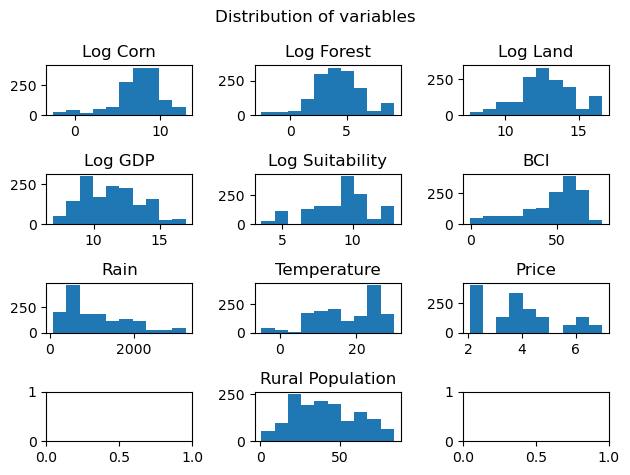

In [156]:
fig, axs = plt.subplots(4,3)

fig.suptitle('Distribution of variables')

# Log Corn
axs[0, 0].set_title('Log Corn')
axs[0, 0].hist(last_df['logcorn'])

# Log Forest
axs[0, 1].set_title('Log Forest')
axs[0, 1].hist(last_df['logforest'])

# Log Land
axs[0, 2].set_title('Log Land')
axs[0, 2].hist(last_df['logland'])

# Log GDP
axs[1, 0].set_title('Log GDP')
axs[1, 0].hist(last_df['loggdp'])

# Log Suitability
axs[1, 1].set_title('Log Suitability')
axs[1, 1].hist(last_df['logsuit'])

# BCI
axs[1, 2].set_title('BCI')
axs[1, 2].hist(last_df['bci_bci'])

# Rain
axs[2, 0].set_title('Rain')
axs[2, 0].hist(last_df['rain'])

# Temperature
axs[2, 1].set_title('Temperature')
axs[2, 1].hist(last_df['Average_Temperature'])

# Price
axs[2, 2].set_title('Price')
axs[2, 2].hist(last_df['price'])

# Rural Population
axs[3, 1].set_title('Rural Population')
axs[3, 1].hist(last_df['wdi_poprul'])

plt.tight_layout()
plt.show()

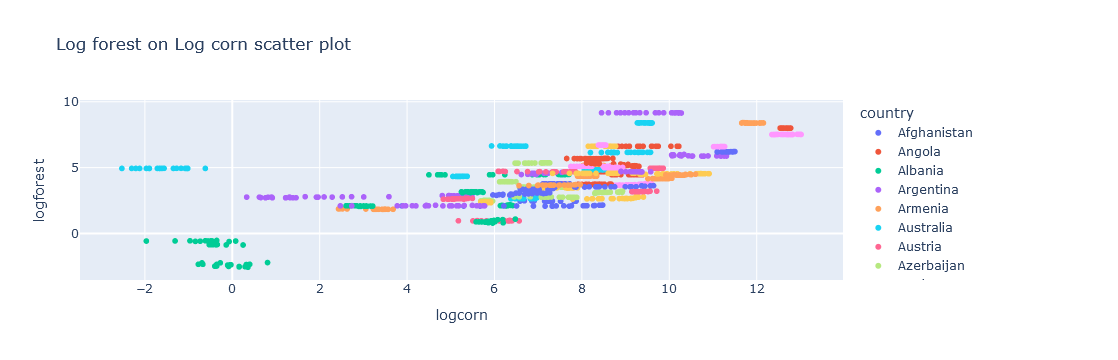

In [158]:
fig = px.scatter(last_df,
           x='logcorn', 
           y='logforest', 
           color='country', 
           hover_name='country',
           title='Log forest on Log corn scatter plot')
fig.show()

In [160]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var = last_df['suitability']
median_suitable_land = initial_hetero_var.median()
median_suitable_land
# Creating a dummy variable for whether the land size is higher than the median
last_df['heterogeneityDummy'] = last_df['logsuit'].apply(lambda val: 1 if (val>=last_df['logsuit'].median()) else 0)

<Figure size 640x480 with 0 Axes>

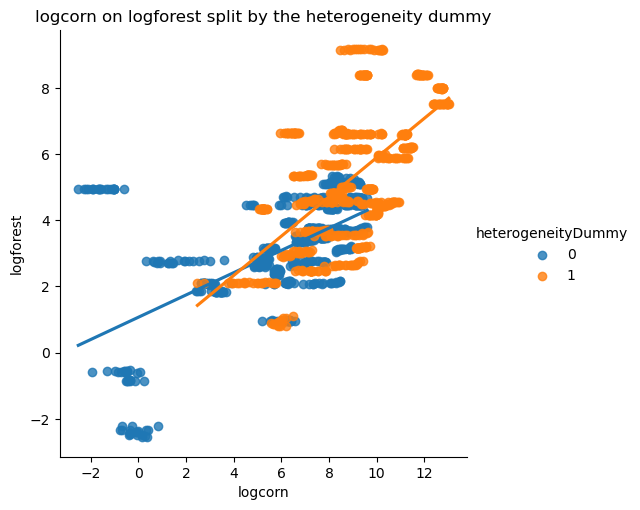

In [162]:
plt.figure()

sns.lmplot(data=last_df,
          x='logcorn',
          y='logforest',
          hue='heterogeneityDummy',
          ci=None)

plt.title('logcorn on logforest split by the heterogeneity dummy')
plt.show()

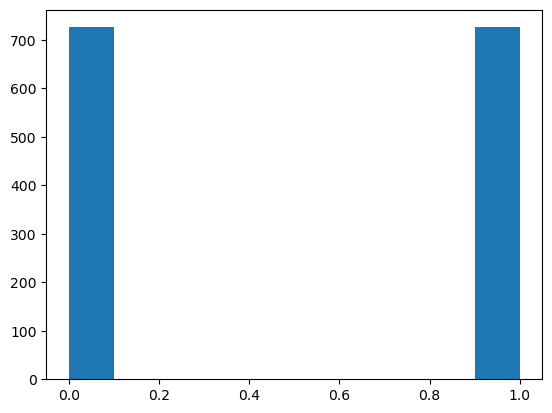

In [164]:
plt.figure()

plt.hist(last_df['hetero'])

plt.show()

# **Functional Form tests**

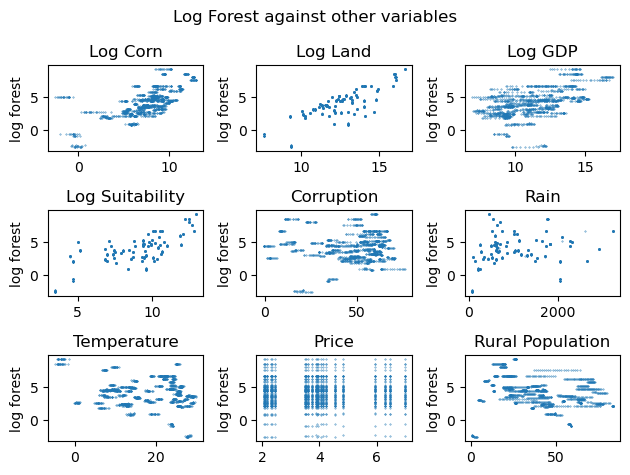

In [400]:
fig, axs = plt.subplots(3,3)

fig.suptitle('Log Forest against other variables')

# Log Corn
axs[0, 0].set_title('Log Corn')
axs[0, 0].scatter(last_df['logcorn'], last_df['logforest'], s=0.1)
axs[0, 0].set_ylabel('log forest')
#axs[0, 0].set_xlabel('log corn')


# Log Land
axs[0, 1].set_title('Log Land')
axs[0, 1].scatter(last_df['logland'], last_df['logforest'], s=0.1)
axs[0, 1].set_ylabel('log forest')
#axs[0, 1].set_xlabel('log land')

# Log GDP
axs[0, 2].set_title('Log GDP')
axs[0, 2].scatter(last_df['loggdp'], last_df['logforest'], s=0.1)
axs[0, 2].set_ylabel('log forest')
#axs[0, 2].set_xlabel('log gdp')

# Log Suitability
axs[1, 0].set_title('Log Suitability')
axs[1, 0].scatter(last_df['logsuit'], last_df['logforest'], s=0.1)
axs[1, 0].set_ylabel('log forest')
#axs[1, 0].set_xlabel('log suitability')

# BCI
axs[1, 1].set_title('Corruption')
axs[1, 1].scatter(last_df['bci_bci'], last_df['logforest'], s=0.1)
axs[1, 1].set_ylabel('log forest')
#axs[1, 1].set_xlabel('corruption')


# Rain
axs[1, 2].set_title('Rain')
axs[1, 2].scatter(last_df['rain'], last_df['logforest'], s=0.1)
axs[1, 2].set_ylabel('log forest')
#axs[1, 2].set_xlabel('rain')

# Temperature
axs[2, 0].set_title('Temperature')
axs[2, 0].scatter(last_df['Average_Temperature'], last_df['logforest'], s=0.1)
axs[2, 0].set_ylabel('log forest')
#axs[2, 0].set_xlabel('temperature')

# Price
axs[2, 1].set_title('Price')
axs[2, 1].scatter(last_df['price'], last_df['logforest'], s=0.1)
axs[2, 1].set_ylabel('log forest')
#axs[2, 1].set_xlabel('price')

# Rural Population
axs[2, 2].set_title('Rural Population')
axs[2, 2].scatter(last_df['wdi_poprul'], last_df['logforest'], s=0.1)
axs[2, 2].set_ylabel('log forest')
#axs[2, 2].set_xlabel('rural pop')

plt.tight_layout()
plt.show()

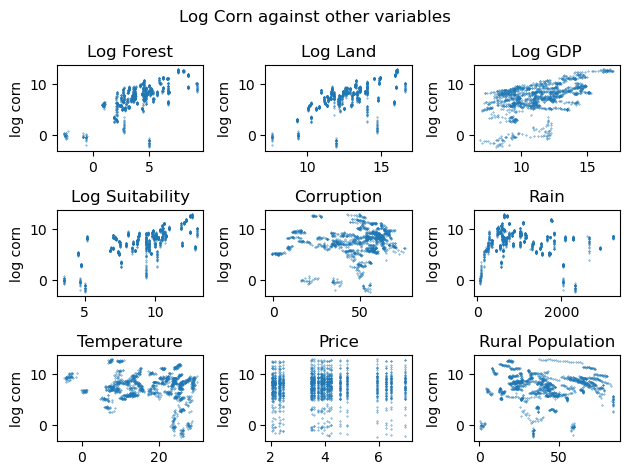

In [402]:
fig, axs = plt.subplots(3,3)

fig.suptitle('Log Corn against other variables')

# Log Corn
axs[0, 0].set_title('Log Forest')
axs[0, 0].scatter(last_df['logforest'], last_df['logcorn'], s=0.1)
axs[0, 0].set_ylabel('log corn')
#axs[0, 0].set_xlabel('log corn')


# Log Land
axs[0, 1].set_title('Log Land')
axs[0, 1].scatter(last_df['logland'], last_df['logcorn'], s=0.1)
axs[0, 1].set_ylabel('log corn')
#axs[0, 1].set_xlabel('log land')

# Log GDP
axs[0, 2].set_title('Log GDP')
axs[0, 2].scatter(last_df['loggdp'], last_df['logcorn'], s=0.1)
axs[0, 2].set_ylabel('log corn')
#axs[0, 2].set_xlabel('log gdp')

# Log Suitability
axs[1, 0].set_title('Log Suitability')
axs[1, 0].scatter(last_df['logsuit'], last_df['logcorn'], s=0.1)
axs[1, 0].set_ylabel('log corn')
#axs[1, 0].set_xlabel('log suitability')

# BCI
axs[1, 1].set_title('Corruption')
axs[1, 1].scatter(last_df['bci_bci'], last_df['logcorn'], s=0.1)
axs[1, 1].set_ylabel('log corn')
#axs[1, 1].set_xlabel('corruption')


# Rain
axs[1, 2].set_title('Rain')
axs[1, 2].scatter(last_df['rain'], last_df['logcorn'], s=0.1)
axs[1, 2].set_ylabel('log corn')
#axs[1, 2].set_xlabel('rain')

# Temperature
axs[2, 0].set_title('Temperature')
axs[2, 0].scatter(last_df['Average_Temperature'], last_df['logcorn'], s=0.1)
axs[2, 0].set_ylabel('log corn')
#axs[2, 0].set_xlabel('temperature')

# Price
axs[2, 1].set_title('Price')
axs[2, 1].scatter(last_df['price'], last_df['logcorn'], s=0.1)
axs[2, 1].set_ylabel('log corn')
#axs[2, 1].set_xlabel('price')

# Rural Population
axs[2, 2].set_title('Rural Population')
axs[2, 2].scatter(last_df['wdi_poprul'], last_df['logcorn'], s=0.1)
axs[2, 2].set_ylabel('log corn')
#axs[2, 2].set_xlabel('rural pop')

plt.tight_layout()
plt.show()

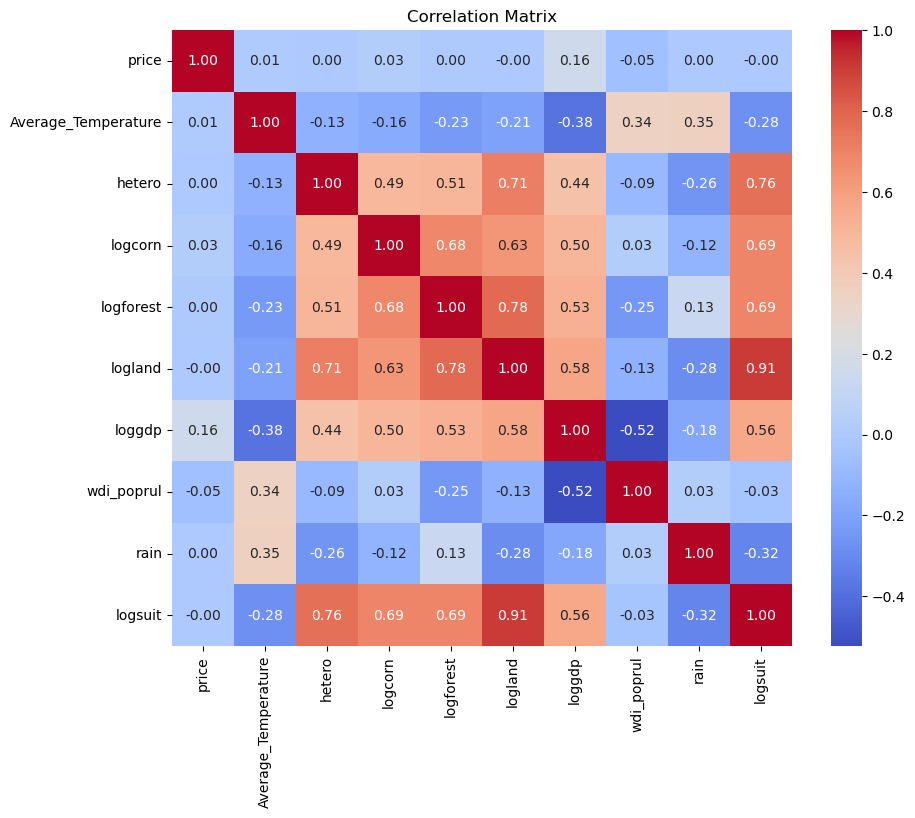

In [404]:
# Combine independent variables and dependent variable for the correlation matrix
variables = last_df[['price', 'Average_Temperature', 
              'hetero', 'logcorn', 'logforest', 'logland', 'loggdp', 'wdi_poprul', 'rain', 'logsuit']]

# Compute the correlation matrix
correlation_matrix = variables.corr()

# Display the correlation matrix
#print("Correlation Matrix:")
#print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


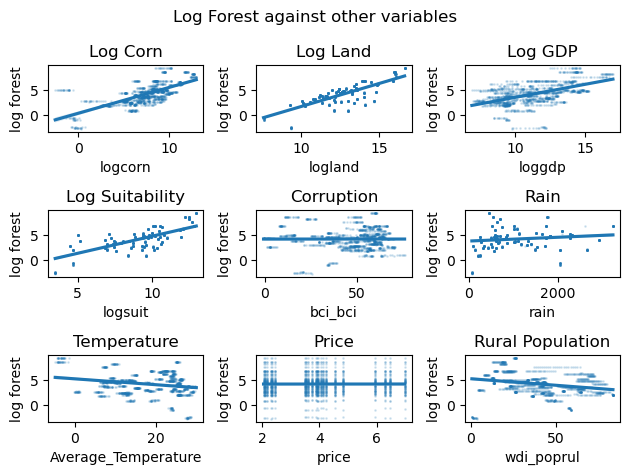

In [406]:
fig, axs = plt.subplots(3,3)

fig.suptitle('Log Forest against other variables')

# Log Corn
axs[0, 0].set_title('Log Corn')
sns.regplot(ax=axs[0, 0], x=last_df['logcorn'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[0, 0].set_ylabel('log forest')
#axs[0, 0].set_xlabel('log corn')


# Log Land
axs[0, 1].set_title('Log Land')
sns.regplot(ax=axs[0, 1], x=last_df['logland'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[0, 1].set_ylabel('log forest')
#axs[0, 1].set_xlabel('log land')

# Log GDP
axs[0, 2].set_title('Log GDP')
sns.regplot(ax=axs[0, 2], x=last_df['loggdp'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[0, 2].set_ylabel('log forest')
#axs[0, 2].set_xlabel('log gdp')

# Log Suitability
axs[1, 0].set_title('Log Suitability')
sns.regplot(ax=axs[1, 0], x=last_df['logsuit'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[1, 0].set_ylabel('log forest')
#axs[1, 0].set_xlabel('log suitability')

# BCI
axs[1, 1].set_title('Corruption')
sns.regplot(ax=axs[1, 1], x=last_df['bci_bci'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[1, 1].set_ylabel('log forest')
#axs[1, 1].set_xlabel('corruption')


# Rain
axs[1, 2].set_title('Rain')
sns.regplot(ax=axs[1, 2], x=last_df['rain'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[1, 2].set_ylabel('log forest')
#axs[1, 2].set_xlabel('rain')

# Temperature
axs[2, 0].set_title('Temperature')
sns.regplot(ax=axs[2, 0], x=last_df['Average_Temperature'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[2, 0].set_ylabel('log forest')
#axs[2, 0].set_xlabel('temperature')

# Price
axs[2, 1].set_title('Price')
sns.regplot(ax=axs[2, 1], x=last_df['price'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[2, 1].set_ylabel('log forest')
#axs[2, 1].set_xlabel('price')

# Rural Population
axs[2, 2].set_title('Rural Population')
sns.regplot(ax=axs[2, 2], x=last_df['wdi_poprul'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[2, 2].set_ylabel('log forest')
#axs[2, 2].set_xlabel('rural pop')

plt.tight_layout()
plt.show()

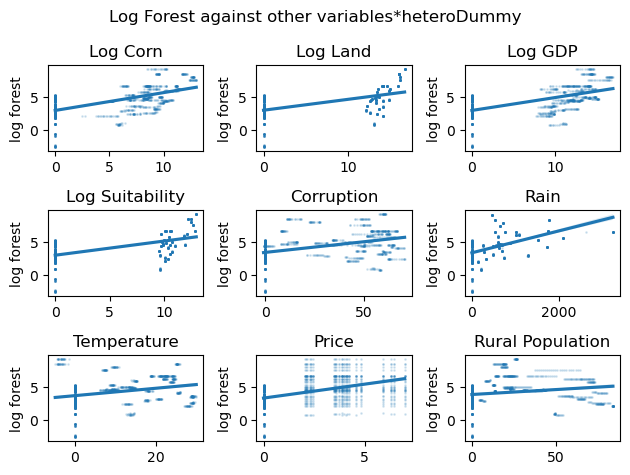

In [408]:
fig, axs = plt.subplots(3,3)

fig.suptitle('Log Forest against other variables*heteroDummy')

# Log Corn
axs[0, 0].set_title('Log Corn')
sns.regplot(ax=axs[0, 0], x=last_df['logcorn']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[0, 0].set_ylabel('log forest')
#axs[0, 0].set_xlabel('log corn')


# Log Land
axs[0, 1].set_title('Log Land')
sns.regplot(ax=axs[0, 1], x=last_df['logland']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[0, 1].set_ylabel('log forest')
#axs[0, 1].set_xlabel('log land')

# Log GDP
axs[0, 2].set_title('Log GDP')
sns.regplot(ax=axs[0, 2], x=last_df['loggdp']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[0, 2].set_ylabel('log forest')
#axs[0, 2].set_xlabel('log gdp')

# Log Suitability
axs[1, 0].set_title('Log Suitability')
sns.regplot(ax=axs[1, 0], x=last_df['logsuit']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[1, 0].set_ylabel('log forest')
#axs[1, 0].set_xlabel('log suitability')

# BCI
axs[1, 1].set_title('Corruption')
sns.regplot(ax=axs[1, 1], x=last_df['bci_bci']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[1, 1].set_ylabel('log forest')
#axs[1, 1].set_xlabel('corruption')


# Rain
axs[1, 2].set_title('Rain')
sns.regplot(ax=axs[1, 2], x=last_df['rain']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[1, 2].set_ylabel('log forest')
#axs[1, 2].set_xlabel('rain')

# Temperature
axs[2, 0].set_title('Temperature')
sns.regplot(ax=axs[2, 0], x=last_df['Average_Temperature']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[2, 0].set_ylabel('log forest')
#axs[2, 0].set_xlabel('temperature')

# Price
axs[2, 1].set_title('Price')
sns.regplot(ax=axs[2, 1], x=last_df['price']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[2, 1].set_ylabel('log forest')
#axs[2, 1].set_xlabel('price')

# Rural Population
axs[2, 2].set_title('Rural Population')
sns.regplot(ax=axs[2, 2], x=last_df['wdi_poprul']*last_df['hetero'], y=last_df['logforest'], scatter_kws={'s': 1, 'alpha': 0.15})
axs[2, 2].set_ylabel('log forest')
#axs[2, 2].set_xlabel('rural pop')

plt.tight_layout()
plt.show()

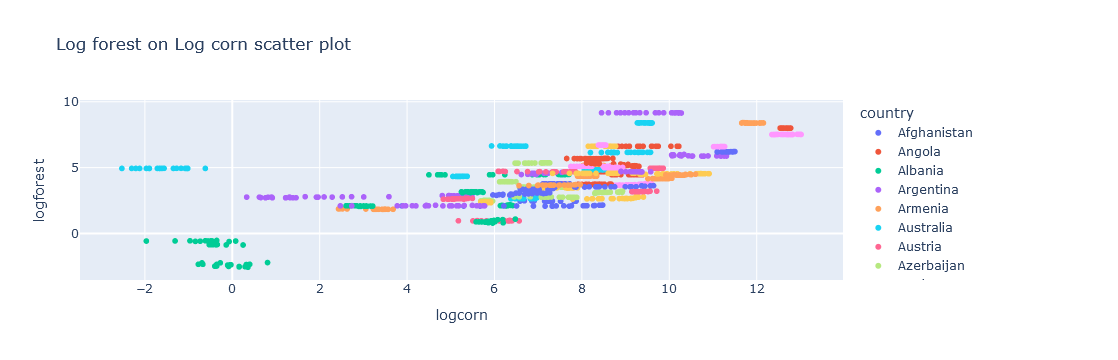

In [461]:
fig = px.scatter(last_df,
           x='logcorn', 
           y='logforest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','logcorn','logforest'],
           title='Log forest on Log corn scatter plot')

fig.show()

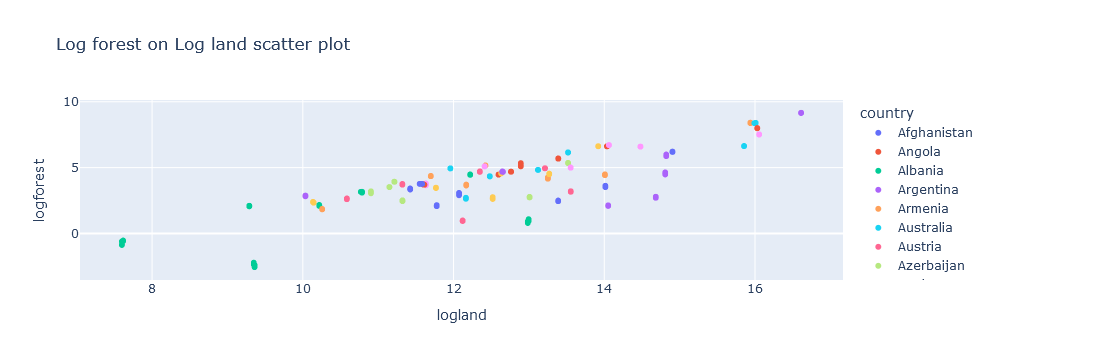

In [424]:
fig = px.scatter(last_df,
           x='logland', 
           y='logforest', 
           color='country', 
           hover_name='country',
           title='Log forest on Log land scatter plot')

fig.show()

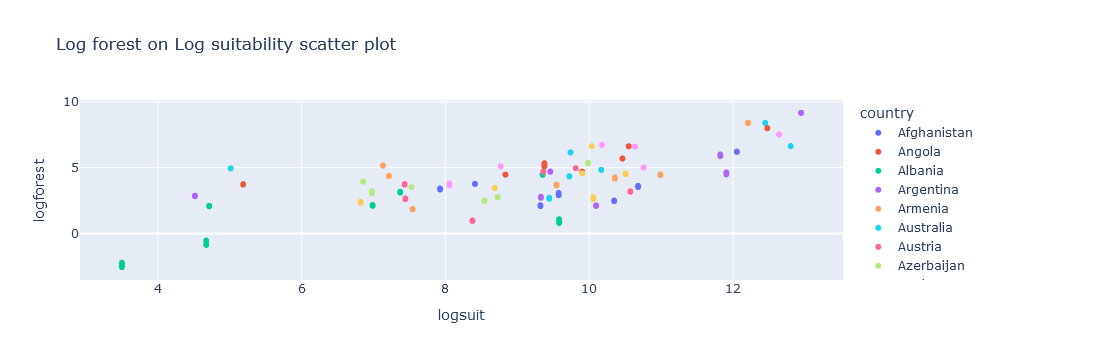

In [428]:
fig = px.scatter(last_df,
           x='logsuit', 
           y='logforest', 
           color='country', 
           hover_name='country',
           title='Log forest on Log suitability scatter plot')

fig.show()

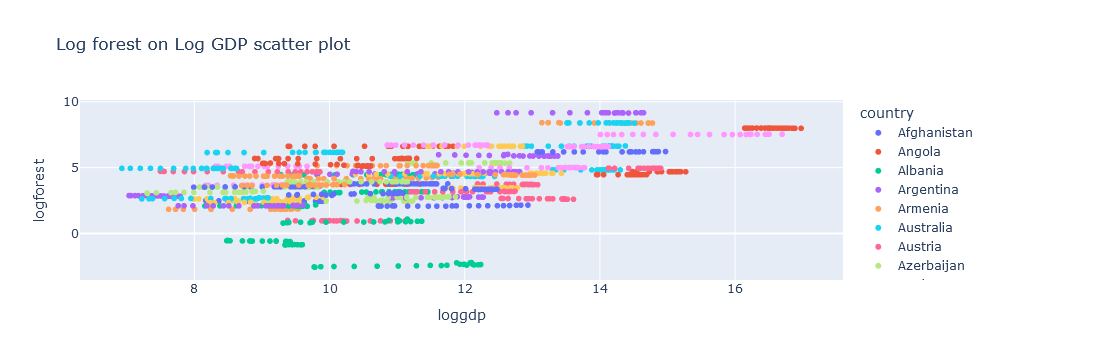

In [454]:
fig = px.scatter(last_df,
           x='loggdp', 
           y='logforest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','loggdp','logforest'],
           title='Log forest on Log GDP scatter plot')

fig.show()

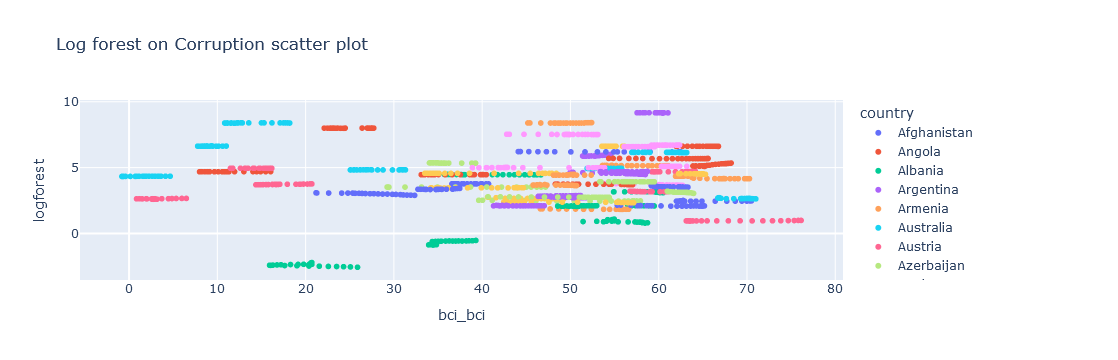

In [452]:
fig = px.scatter(last_df,
           x='bci_bci', 
           y='logforest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','bci_bci','logforest'],
           title='Log forest on Corruption scatter plot')

fig.show()

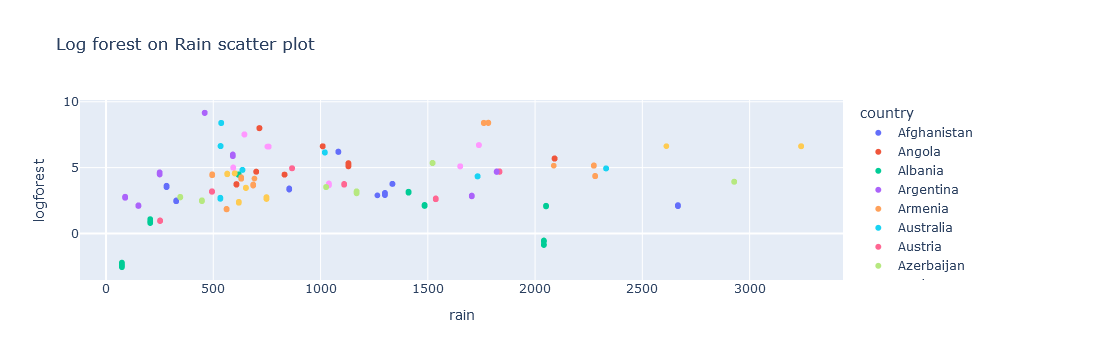

In [432]:
fig = px.scatter(last_df,
           x='rain', 
           y='logforest', 
           color='country', 
           hover_name='country',
           title='Log forest on Rain scatter plot')

fig.show()

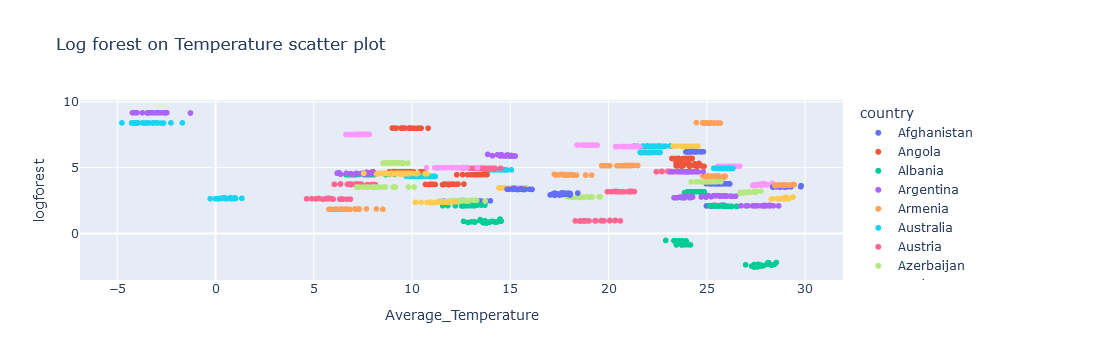

In [450]:
fig = px.scatter(last_df,
           x='Average_Temperature', 
           y='logforest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','Average_Temperature','logforest'],
           title='Log forest on Temperature scatter plot')

fig.show()

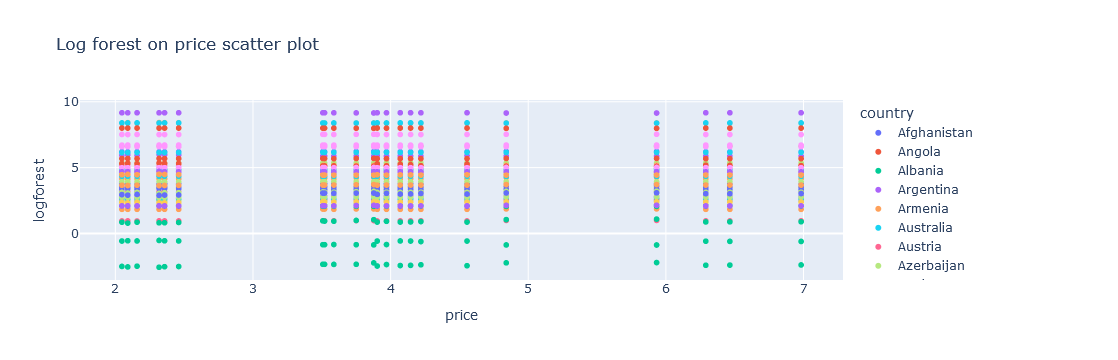

In [436]:
fig = px.scatter(last_df,
           x='price', 
           y='logforest', 
           color='country', 
           hover_name='country',
           title='Log forest on price scatter plot')

fig.show()

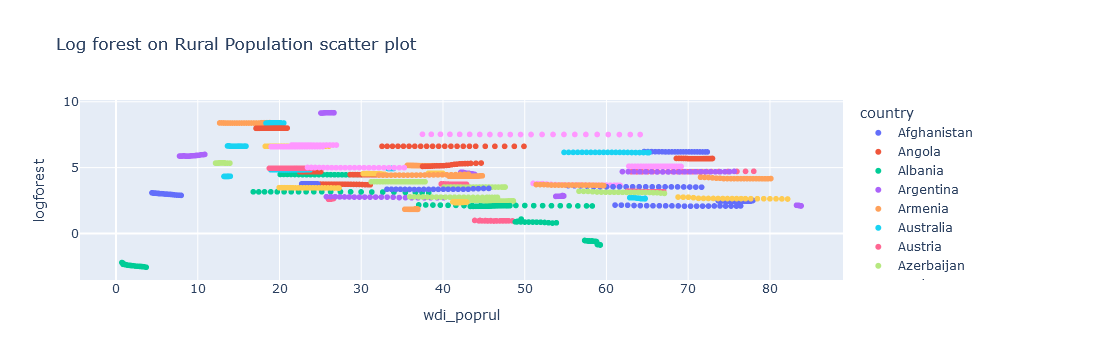

In [448]:
fig = px.scatter(last_df,
           x='wdi_poprul', 
           y='logforest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','wdi_poprul','logforest'],
           title='Log forest on Rural Population scatter plot')

fig.show()

# **SLR**

In [463]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
slr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
slr_summary = slr.summary
slr_resid = slr.resid

# Print the model summary
print(slr.summary(), 'skewness of residuals', slr_resid.skew())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     20.10
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.06e-05
Time:                        11:59:39   Log-Likelihood:                -2648.6
No. Observations:                1452   AIC:                             5301.
Df Residuals:                    1450   BIC:                             5312.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4091      0.918      0.446   

In [628]:
brazil = last_df[last_df['country'] == 'Brazil']

In [632]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
slr = smf.ols(formula=model_formula_no_controls, data=brazil).fit()

# Store the model summary in a variable
slr_summary = slr.summary
slr_resid = slr.resid

# Print the model summary
print(slr.summary(), 'skewness of residuals', slr_resid.skew())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     5.340
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0316
Time:                        14:42:27   Log-Likelihood:                 70.669
No. Observations:                  22   AIC:                            -137.3
Df Residuals:                      20   BIC:                            -135.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.8033      0.178     49.332   

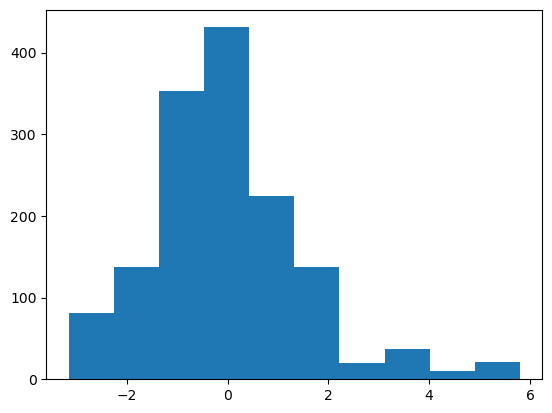

Skewness of SLR Residuals 0.9381203217743873


In [465]:
plt.figure()

plt.hist(slr_resid)

plt.show()

print('Skewness of SLR Residuals', slr_resid.skew())

# **MLR**

In [468]:
print(last_df.keys())

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', 'corn1992', 'forest', 'suitability', '% Land available',
       'price', 'temperature', 'Average_Temperature', 'gdp', 'rain', 'bci_bci',
       'wdi_poprul', 'logcorn', 'logforest', 'logland', 'loggdp', 'logsuit',
       'hetero', 'heterogeneityDummy'],
      dtype='object')


In [472]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn") + Q("logland") + Q("loggdp") + Q("price") + Q("Average_Temperature") + Q("rain") + Q("bci_bci")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
mlr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
mlr_summary = mlr.summary
mlr_resid = mlr.resid

# Print the model summary
print(mlr.summary(), 'skewness of residuals', mlr_resid.skew())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     68.85
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.31e-27
Time:                        12:00:01   Log-Likelihood:                -1812.5
No. Observations:                1452   AIC:                             3641.
Df Residuals:                    1444   BIC:                             3683.
Df Model:                           7                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

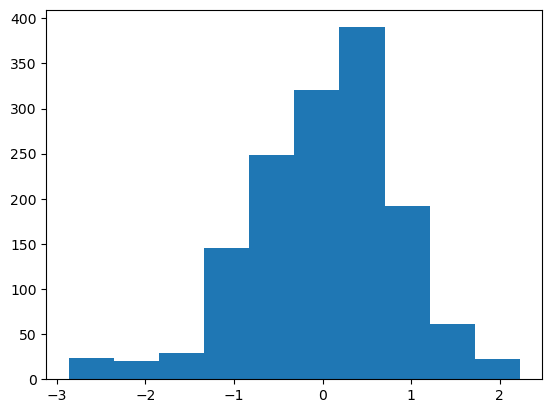

Skewness of SLR Residuals -0.5661506618048857


In [474]:
plt.figure()

plt.hist(mlr_resid)

plt.show()

print('Skewness of SLR Residuals', mlr_resid.skew())

In [476]:
# Create the design matrix (independent variables including constant)
X = sm.add_constant(last_df[['logcorn', 'logland', 'loggdp', 'price', 'Average_Temperature', 'rain', 'bci_bci', 'logsuit']])  # Add other predictors if necessary

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

              Variable         VIF
0                const  125.959531
1              logcorn    2.456479
2              logland    6.469988
3               loggdp    3.221781
4                price    1.052820
5  Average_Temperature    1.387438
6                 rain    1.251050
7              bci_bci    2.075078
8              logsuit    7.005923


# **Fixed Effect**

In [187]:
last_df['country'] = last_df['country'].astype('category')
last_df['year'] = last_df['year'].astype('int')
print(last_df['country'].dtype, last_df['year'].dtype)

category int32


In [189]:
last_df[(last_df['country'] == 'Afghanistan') & (last_df['year'] == 2000)]

country  year  landArea iso3  Total Size Cornfield in ha   corn  \
0  Afghanistan  2000  652230.0  AFG                     96000.0  960.0   

   corn1992   forest  suitability  % Land available  ...   rain  bci_bci  \
0    2000.0  12.2811     31149.29          0.047758  ...  327.0    62.77   

   wdi_poprul   logcorn  logforest    logland    loggdp    logsuit  hetero  \
0       77.92  6.866933   2.508061  13.388153  8.169583  10.346547       1   

   heterogeneityDummy  
0                   1  

[1 rows x 24 columns]

In [495]:
fe = last_df[['country', 'year', 'iso3', 'price', 'Average_Temperature', 
              'hetero', 'logcorn', 'logforest', 'logland', 'loggdp', 'wdi_poprul', 'rain', 'logsuit', 'bci_bci']]
#fe['logcorn_hetero'] = fe['logcorn']*fe['hetero']
#fe['logcorn_hetero'] = fe['logcorn']**2

fe = fe.set_index(['country', 'year'])
fe.head(3)

iso3   price  Average_Temperature  hetero   logcorn  \
country     year                                                       
Afghanistan 2000  AFG  2.3175            12.586175       1  6.866933   
            2001  AFG  2.0900            13.413867       1  6.684612   
            2002  AFG  2.3575            13.051083       1  6.907755   

                  logforest    logland    loggdp  wdi_poprul   rain  \
country     year                                                      
Afghanistan 2000   2.508061  13.388153  8.169583       77.92  327.0   
            2001   2.482846  13.388153  8.194374       77.83  327.0   
            2002   2.472421  13.388153  8.362920       77.74  327.0   

                    logsuit  bci_bci  
country     year                      
Afghanistan 2000  10.346547    62.77  
            2001  10.346547    62.67  
            2002  10.346547    62.43

In [498]:
Y = fe['logforest']
X = fe[['logcorn', 'loggdp', 'Average_Temperature', 'wdi_poprul', 'bci_bci', 'price']]
X = add_constant(X)

In [612]:
# Wo time effects and wo logsuit and wo rain (variant in i only)
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=False, drop_absorbed=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

fe_resid = results.resids

print(results, 'Skewness of residuals: ', fe_resid.skew())

                          PanelOLS Estimation Summary                           
Dep. Variable:              logforest   R-squared:                        0.0619
Estimator:                   PanelOLS   R-squared (Between):              0.0133
No. Observations:                1452   R-squared (Within):               0.0619
Date:                Wed, Dec 11 2024   R-squared (Overall):              0.0133
Time:                        12:38:28   Log-likelihood                    2999.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.170
Entities:                          66   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(6,1380)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             3.8919
                            

C:\Users\simon\anaconda3\Lib\site-packages\linearmodels\panel\data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\simon\anaconda3\Lib\site-packages\linearmodels\panel\data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\simon\anaconda3\Lib\site-packages\linearmodels\panel\data.py:680: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\simon\anaconda3\Lib\site-packages\linearmodels\panel

$LogForest_{it} = \beta_0 + \beta_1*LogCorn_{it} + \beta_2*LogGDP_{it} + \beta_3*Price_{t} + \beta_4*AverageTemp_{it} + \beta_6*RuralPop_{it} + \beta_7*CorruptionIndex_{it} + FE_i + \epsilon_{it}$

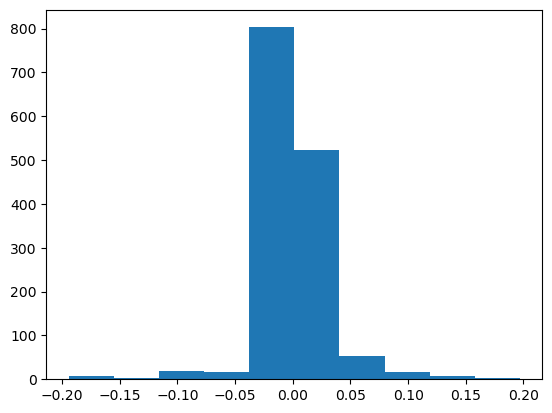

Residuals skewness:  0.003364923612287824


In [615]:
plt.figure()

plt.hist(fe_resid)

plt.show()

print('Residuals skewness: ', fe_resid.skew())

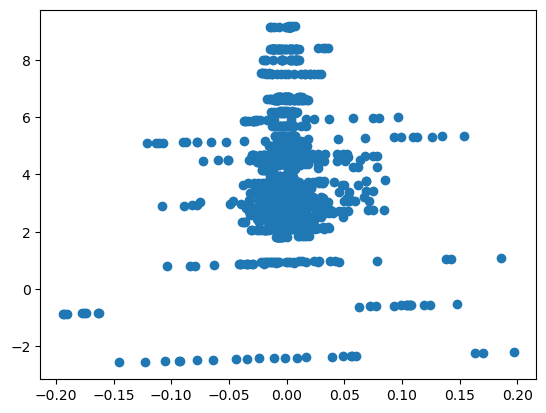

In [617]:
plt.figure()

plt.scatter(fe_resid, last_df['logforest'])

plt.show()

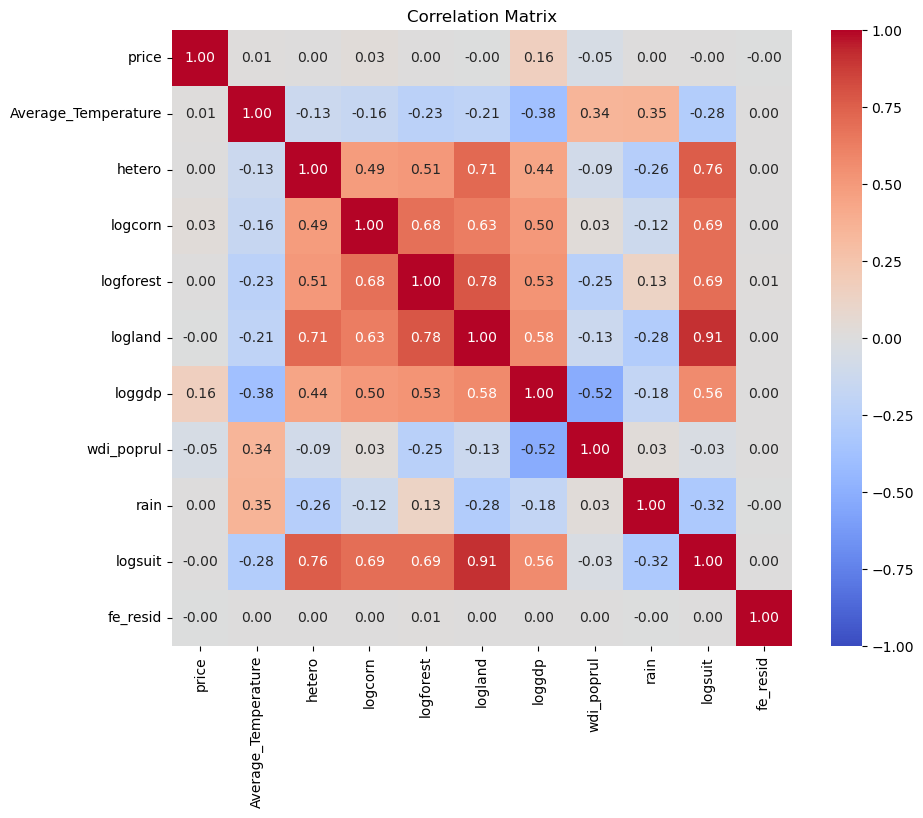

In [619]:
# Assuming 'fe_resid' is a Pandas Series, make sure it has the same length as the other variables.
# Combine all your variables into a single DataFrame
variables = pd.DataFrame({
    'price': last_df['price'],
    'Average_Temperature': last_df['Average_Temperature'],
    'hetero': last_df['hetero'],
    'logcorn': last_df['logcorn'],
    'logforest': last_df['logforest'],
    'logland': last_df['logland'],
    'loggdp': last_df['loggdp'],
    'wdi_poprul': last_df['wdi_poprul'],
    'rain': last_df['rain'],
    'logsuit': last_df['logsuit'],
    'fe_resid': fe_resid.values  # Assuming 'fe_resid' is a Pandas Series with the same index
})

# Compute the correlation matrix
correlation_matrix = variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
